In [93]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
import numpy as np
pd.set_option("display.max_columns", 22)
pd.set_option("display.max_rows", 20)

## Read in Cleaned Data Frame

In [94]:
imdb_df = pd.read_csv("IMDB Model Data/imdb_data.csv")
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Const                     2503 non-null   object 
 1   Title                     2503 non-null   object 
 2   Director                  2503 non-null   object 
 3   Famous Director           2503 non-null   bool   
 4   ReleaseYear               2503 non-null   int64  
 5   Age                       2503 non-null   int64  
 6   Runtime                   2503 non-null   int64  
 7   LongMovie                 2503 non-null   bool   
 8   genres                    2503 non-null   object 
 9   Genre1                    2503 non-null   object 
 10  Genre2                    2351 non-null   object 
 11  Genre3                    1861 non-null   object 
 12  numVotes                  2503 non-null   int64  
 13  IMDb Rating               2503 non-null   float64
 14  My Ratin

In [95]:
reviewed_df = pd.read_csv("IMDB Model Data/reviewed_data.csv")
reviewed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Const                     174 non-null    object 
 1   Title                     174 non-null    object 
 2   Director                  174 non-null    object 
 3   Famous Director           174 non-null    bool   
 4   ReleaseYear               174 non-null    int64  
 5   Age                       174 non-null    int64  
 6   Runtime                   174 non-null    int64  
 7   LongMovie                 174 non-null    bool   
 8   genres                    174 non-null    object 
 9   Genre1                    174 non-null    object 
 10  Genre2                    161 non-null    object 
 11  Genre3                    145 non-null    object 
 12  numVotes                  174 non-null    int64  
 13  IMDb Rating               174 non-null    float64
 14  My Rating 

## Creating Visualizations of Data

### Distribution Movies by Directors

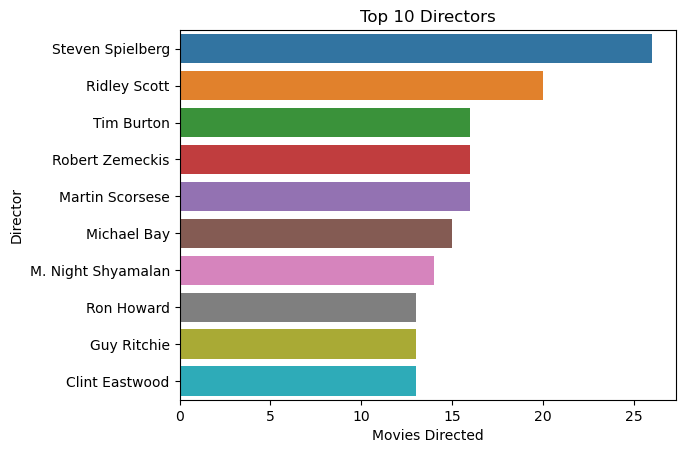

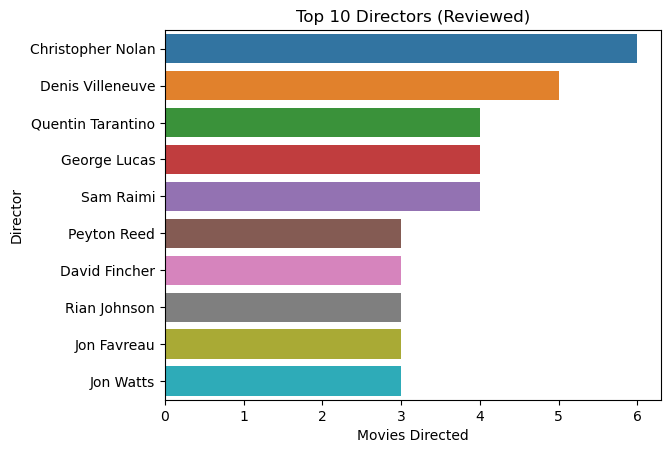

In [96]:
# Get the top 10 directors excluding "Multiple Directors"
imdb_director_counts = imdb_df['Director'].value_counts()
top_10_directors = imdb_director_counts[imdb_director_counts.index != 'Multiple Directors'].head(10)

# Plot the bar chart
sns.barplot(x=top_10_directors.values, y=top_10_directors.index)
plt.xlabel('Movies Directed')
plt.ylabel('Director')
plt.title('Top 10 Directors')
plt.show()

# Get the top 10 directors excluding "Multiple Directors"
reviewed_director_counts = reviewed_df['Director'].value_counts()
top_10_reviewed_directors = reviewed_director_counts[reviewed_director_counts.index != 'Multiple Directors'].head(10)

# Plot the bar chart
sns.barplot(x=top_10_reviewed_directors.values, y=top_10_reviewed_directors.index)
plt.xlabel('Movies Directed')
plt.ylabel('Director')
plt.title('Top 10 Directors (Reviewed)')
plt.show()

### Distribution Movie's Release Dates

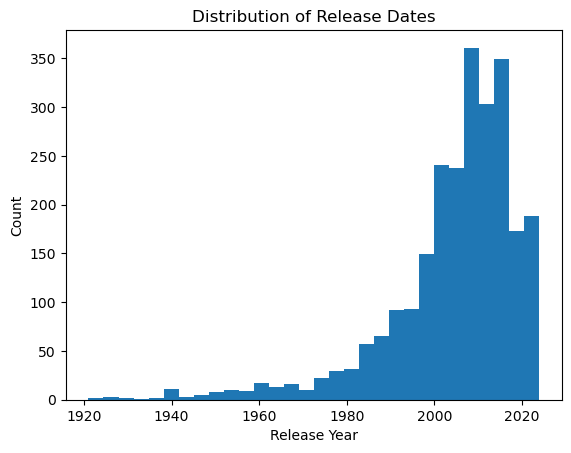

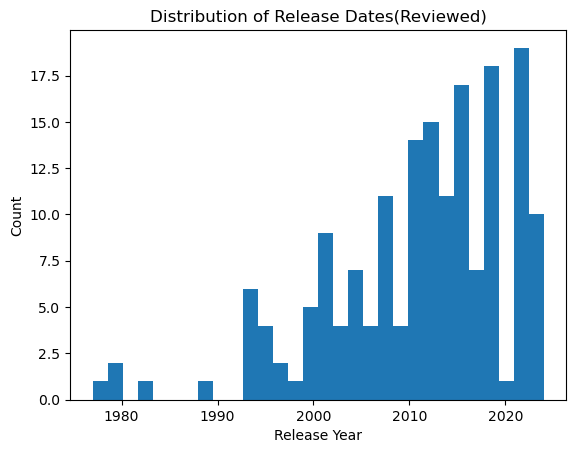

In [97]:
plt.hist(imdb_df['ReleaseYear'], bins=30)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Dates')
plt.show()

plt.hist(reviewed_df['ReleaseYear'], bins=30)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Dates(Reviewed)')
plt.show()


### Distribution of Runtime & Long Movies

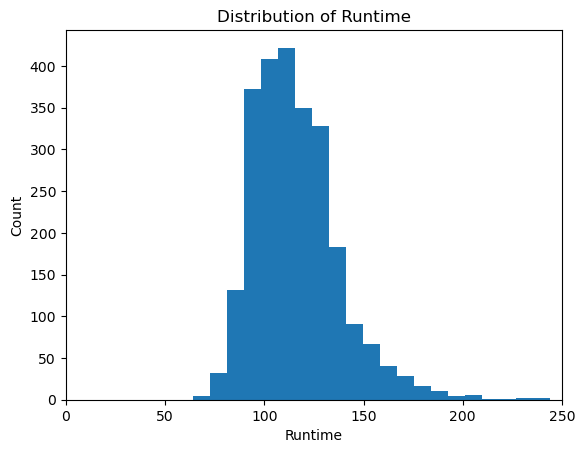

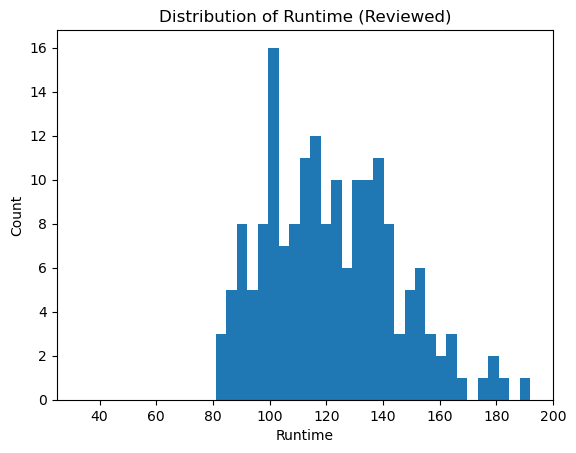

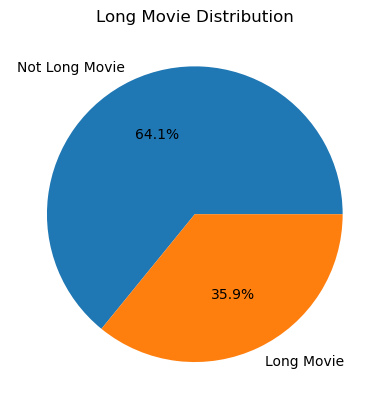

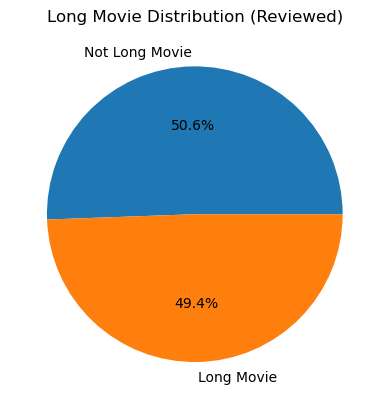

count    2503.000000
mean      115.950459
std        22.189773
min        64.000000
25%       100.000000
50%       113.000000
75%       128.000000
max       321.000000
Name: Runtime, dtype: float64
count    174.000000
mean     122.017241
std       22.996223
min       81.000000
25%      103.000000
50%      119.500000
75%      138.000000
max      192.000000
Name: Runtime, dtype: float64


In [98]:
plt.hist(imdb_df['Runtime'], bins=30)
plt.xlabel('Runtime')
plt.ylabel('Count')
plt.title('Distribution of Runtime')
plt.xlim(0, 250)  # Set the x-axis range
plt.show()

# Visualization for Runtime
plt.hist(reviewed_df['Runtime'], bins=30)
plt.xlabel('Runtime')
plt.ylabel('Count')
plt.title('Distribution of Runtime (Reviewed)')
plt.xlim(25, 200)  # Set the x-axis range
plt.show()

# Pie chart for "longmovie" column
longmovie_counts = imdb_df['LongMovie'].value_counts()
labels = ['Not Long Movie', 'Long Movie']
plt.pie(longmovie_counts, labels=labels, autopct='%1.1f%%')
plt.title('Long Movie Distribution')
plt.show()

# Pie chart for "longmovie" column
longmovie_counts = reviewed_df['LongMovie'].value_counts()
labels = ['Not Long Movie', 'Long Movie']
plt.pie(longmovie_counts, labels=labels, autopct='%1.1f%%')
plt.title('Long Movie Distribution (Reviewed)')
plt.show()

print(imdb_df.Runtime.describe())
print(reviewed_df.Runtime.describe())

### Correlation of Age Compared to Runtime

/tmp/ipykernel_946980/2497868250.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_runtime_by_age = imdb_df.groupby(age_groups)['Runtime'].mean()


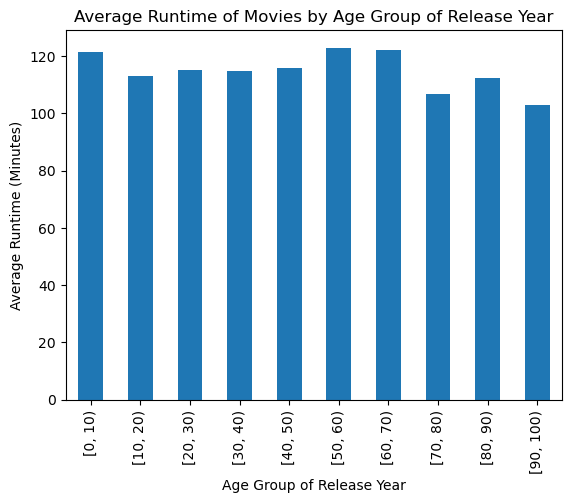

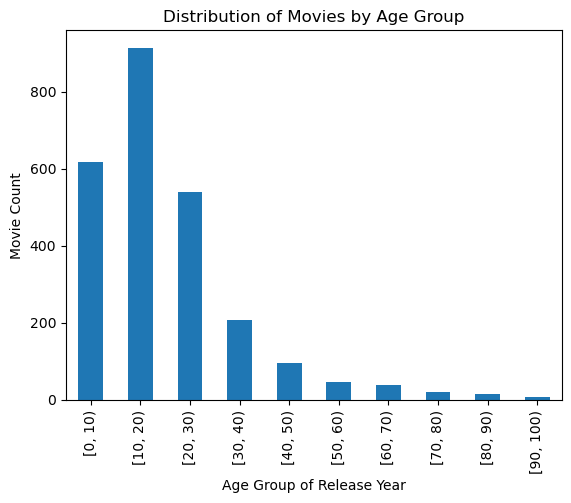

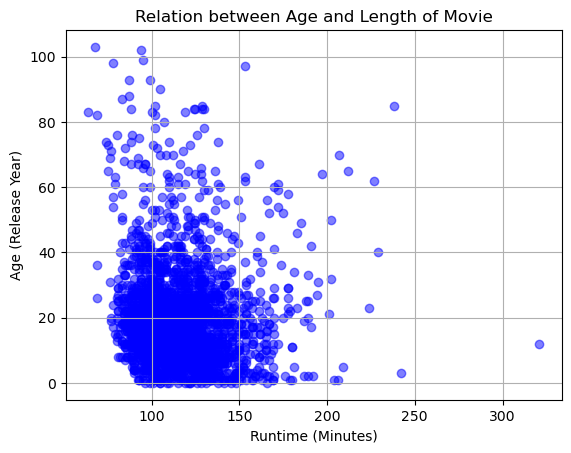

In [99]:
# Group age into groups of 10 years
age_groups = pd.cut(imdb_df['Age'], bins=range(0, 101, 10), right=False)

# Calculate the average runtime for each age group
average_runtime_by_age = imdb_df.groupby(age_groups)['Runtime'].mean()

# Plot the bar plot
average_runtime_by_age.plot(kind='bar')

# Set the x-axis and y-axis labels
plt.xlabel('Age Group of Release Year')
plt.ylabel('Average Runtime (Minutes)')
plt.title('Average Runtime of Movies by Age Group of Release Year')

# Show the plot
plt.show()
age_groups = pd.cut(imdb_df['Age'], bins=range(0, 101, 10), right=False)

# Count the number of movies in each age group
age_counts = age_groups.value_counts().sort_index()

# Plot the bar plot
age_counts.plot(kind='bar')

# Set the x-axis and y-axis labels
plt.xlabel('Age Group of Release Year')
plt.ylabel('Movie Count')
plt.title('Distribution of Movies by Age Group')

# Show the plot
plt.show()

# Create a scatter plot with age on the y-axis and runtime on the x-axis
plt.scatter(imdb_df['Runtime'], imdb_df['Age'], alpha=0.5, color='blue')

# Set the x-axis and y-axis labels
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Age (Release Year)')

# Set the title
plt.title('Relation between Age and Length of Movie')

# Set the grid
plt.grid(True)

# Show the plot
plt.show()

## Show Relation Between Age and Rating

/tmp/ipykernel_946980/1026792613.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_by_age = reviewed_df.groupby(age_groups_reviewed)['My Rating'].mean()


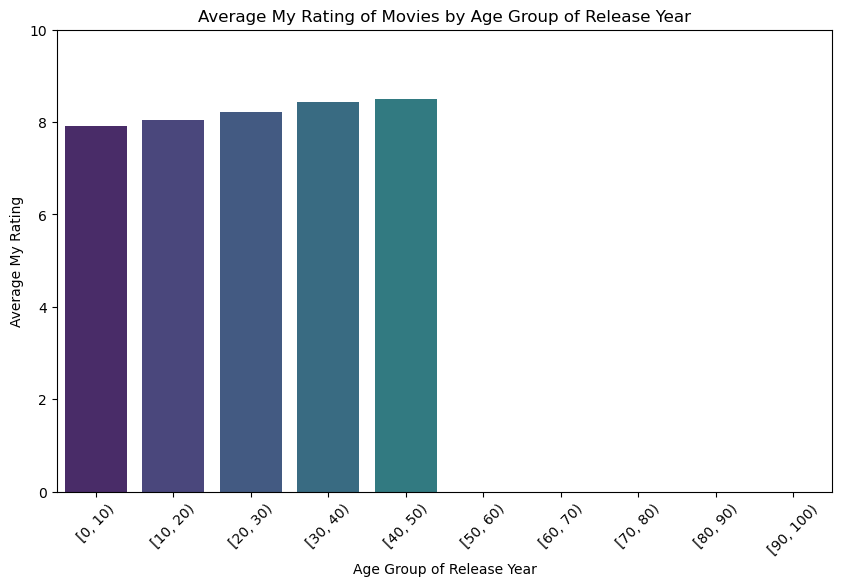

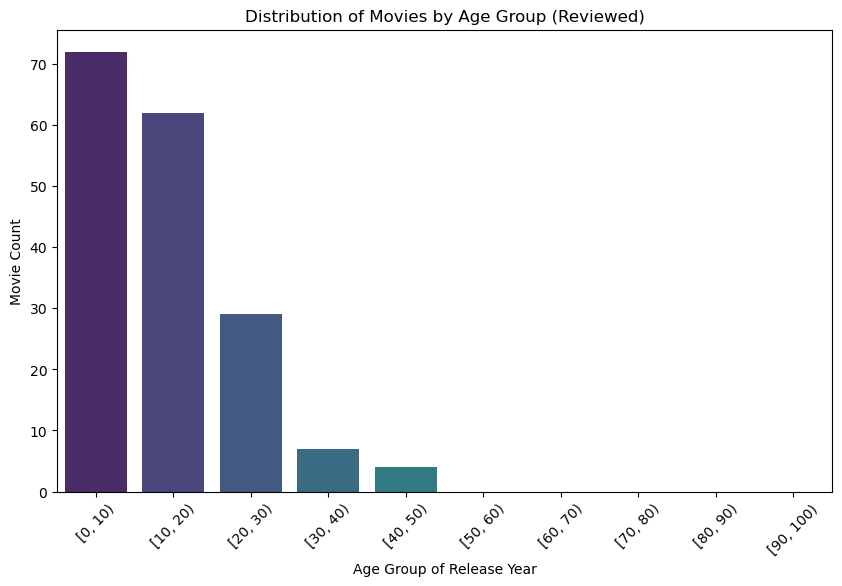

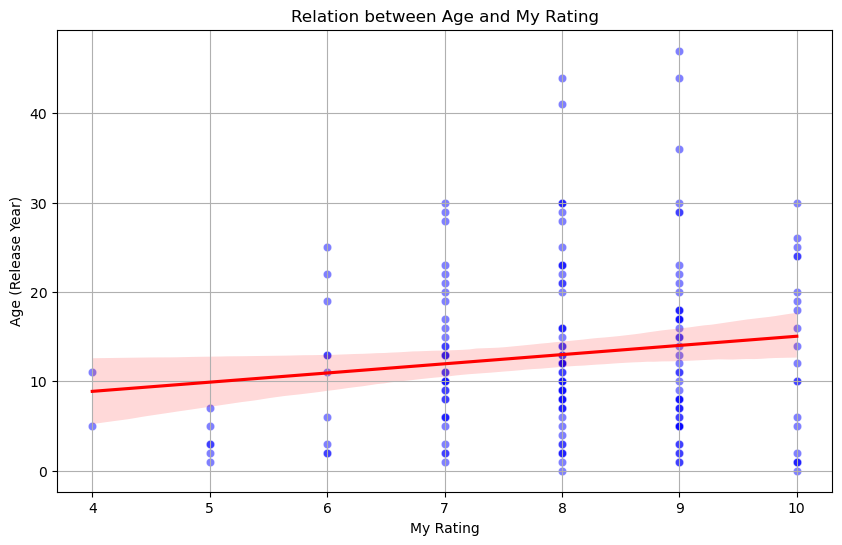

In [100]:
# Group age into groups of 10 years
age_groups_reviewed = pd.cut(reviewed_df['Age'], bins=range(0, 101, 10), right=False)

# Calculate the average rating for each age group
average_rating_by_age = reviewed_df.groupby(age_groups_reviewed)['My Rating'].mean()

# Plot the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_by_age.index.astype(str), y=average_rating_by_age.values, palette="viridis")
plt.xlabel('Age Group of Release Year')
plt.ylabel('Average My Rating')
plt.title('Average My Rating of Movies by Age Group of Release Year')
plt.xticks(rotation=45)
plt.ylim(0, 10)
plt.show()

# Count the number of movies in each age group
age_counts_reviewed = age_groups_reviewed.value_counts().sort_index()

# Plot the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts_reviewed.index.astype(str), y=age_counts_reviewed.values, palette="viridis")
plt.xlabel('Age Group of Release Year')
plt.ylabel('Movie Count')
plt.title('Distribution of Movies by Age Group (Reviewed)')
plt.xticks(rotation=45)
plt.show()

# Create a scatter plot with age on the y-axis and my rating on the x-axis using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reviewed_df['My Rating'], y=reviewed_df['Age'], alpha=0.5, color='blue')
sns.regplot(x=reviewed_df['My Rating'], y=reviewed_df['Age'], scatter=False, color='red')
plt.xlabel('My Rating')
plt.ylabel('Age (Release Year)')
plt.title('Relation between Age and My Rating')
plt.grid(True)
plt.show()


## Correlation Between Runtime and Rating

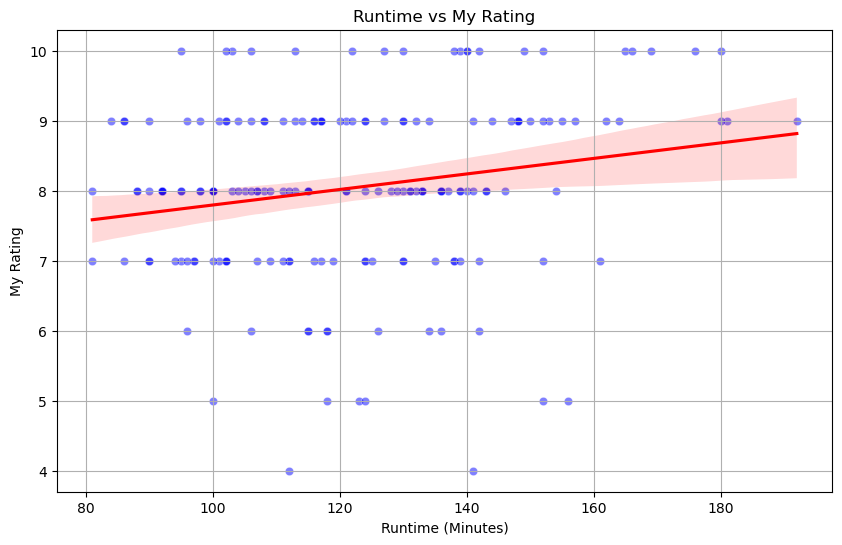

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reviewed_df['Runtime'], y=reviewed_df['My Rating'], alpha=0.5, color='blue')
sns.regplot(x=reviewed_df['Runtime'], y=reviewed_df['My Rating'], scatter=False, color='red')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('My Rating')
plt.title('Runtime vs My Rating')
plt.grid(True)
plt.show()

### Distribution of Genre

In [102]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Const                     2503 non-null   object 
 1   Title                     2503 non-null   object 
 2   Director                  2503 non-null   object 
 3   Famous Director           2503 non-null   bool   
 4   ReleaseYear               2503 non-null   int64  
 5   Age                       2503 non-null   int64  
 6   Runtime                   2503 non-null   int64  
 7   LongMovie                 2503 non-null   bool   
 8   genres                    2503 non-null   object 
 9   Genre1                    2503 non-null   object 
 10  Genre2                    2351 non-null   object 
 11  Genre3                    1861 non-null   object 
 12  numVotes                  2503 non-null   int64  
 13  IMDb Rating               2503 non-null   float64
 14  My Ratin

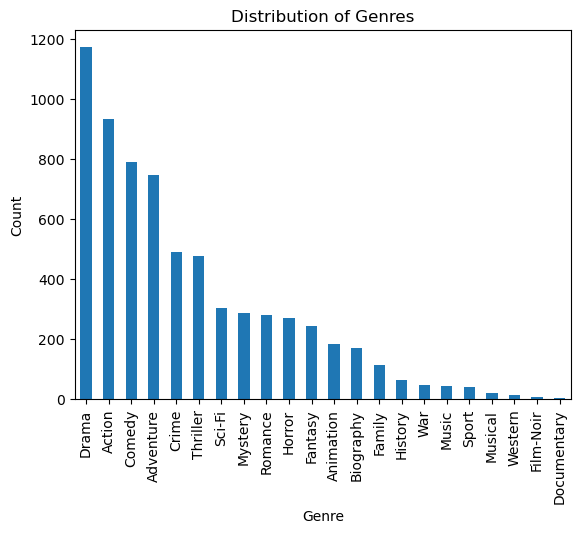

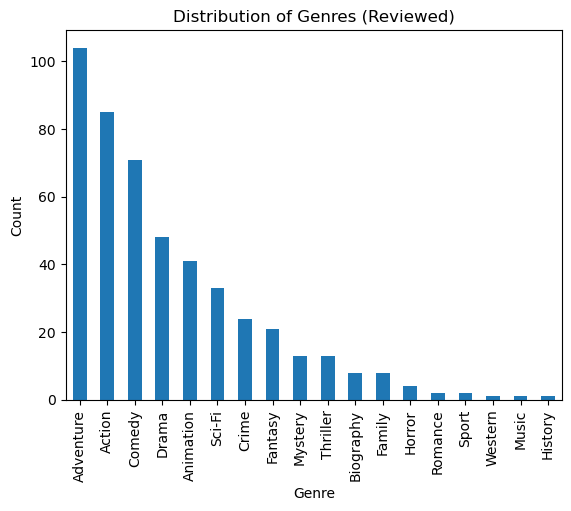

In [103]:
# Count the occurrences of each genre in Genre1, Genre2, Genre3 columns
genre_counts = pd.concat([imdb_df['Genre1'], imdb_df['Genre2'], imdb_df['Genre3']]).value_counts()

# Plot the stacked bar plot
genre_counts.plot(kind='bar', stacked=True)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.show()

# Count the occurrences of each genre in Genre1, Genre2, Genre3 columns
genre_counts = pd.concat([reviewed_df['Genre1'], reviewed_df['Genre2'], reviewed_df['Genre3']]).value_counts()

# Plot the stacked bar plot
genre_counts.plot(kind='bar', stacked=True)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres (Reviewed)')
plt.show()


### Average Rating by Genre

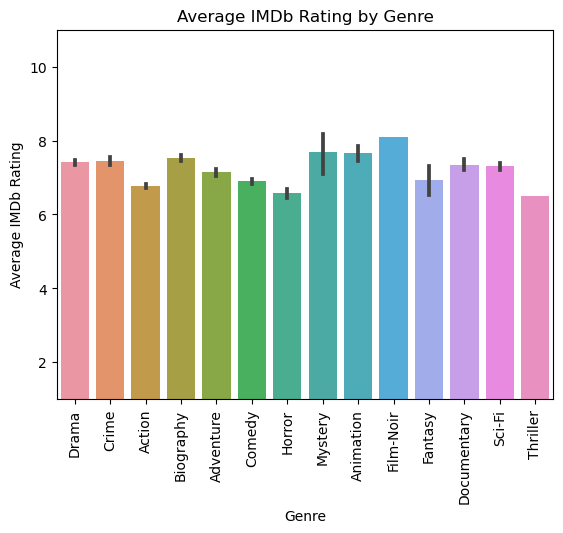

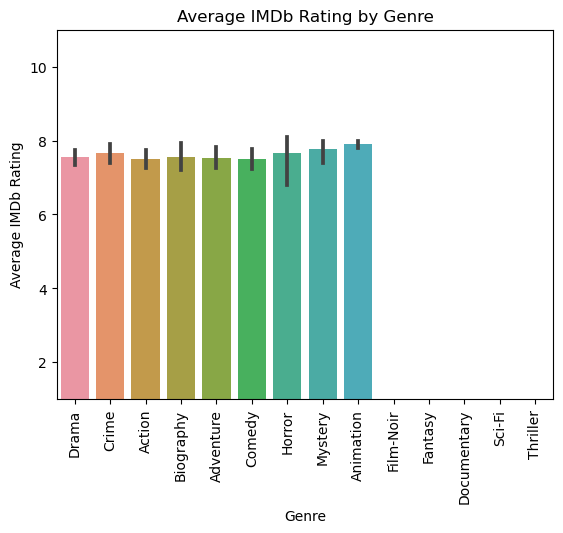

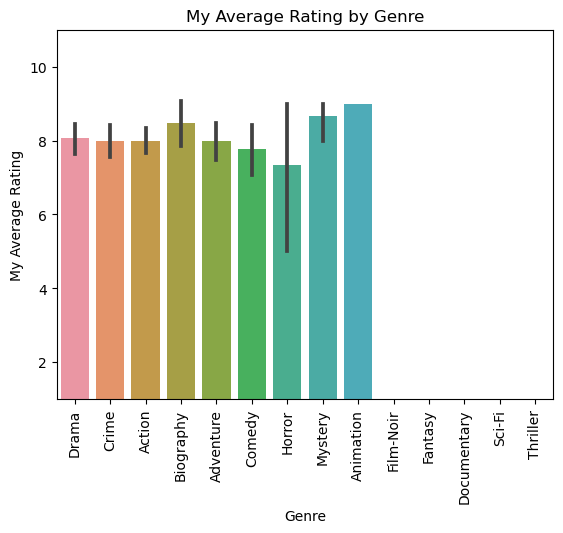

In [104]:
# Make y scale greater for each to increase ceiling and see height of mystery column
sns.barplot(x=imdb_df['Genre1'], y=imdb_df['IMDb Rating'])
plt.xlabel('Genre')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Genre')
plt.xticks(rotation=90)
plt.ylim(1, 11)
plt.show()

sns.barplot(x=imdb_df['Genre1'], y=reviewed_df['IMDb Rating'])
plt.xlabel('Genre')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Genre')
plt.xticks(rotation=90)
plt.ylim(1, 11)
plt.show()

sns.barplot(x=imdb_df['Genre1'], y=reviewed_df['My Rating'])
plt.xlabel('Genre')
plt.ylabel('My Average Rating')
plt.title('My Average Rating by Genre')
plt.xticks(rotation=90)
plt.ylim(1, 11)  # Increase the upper limit of the y-axis range
plt.show()



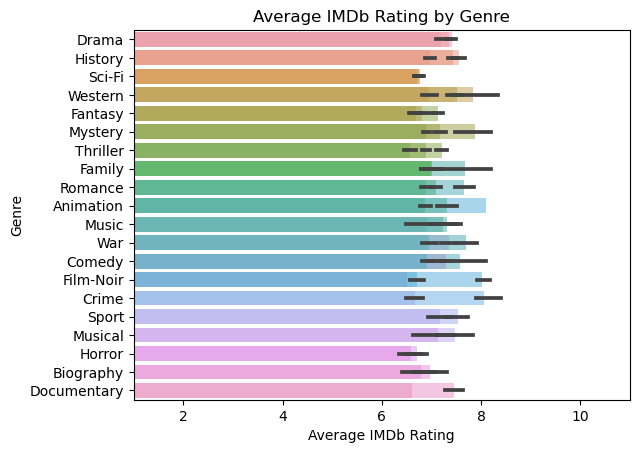

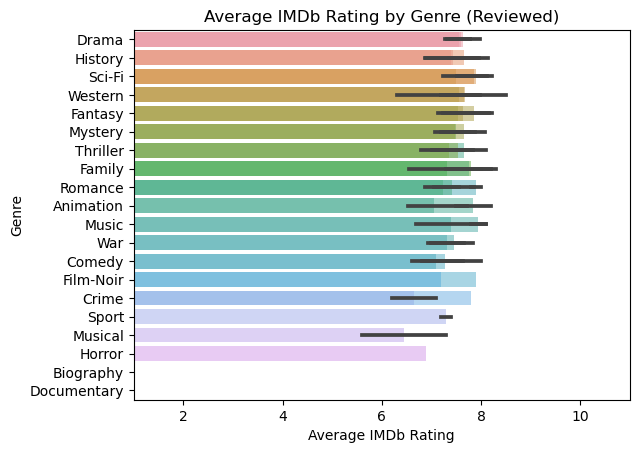

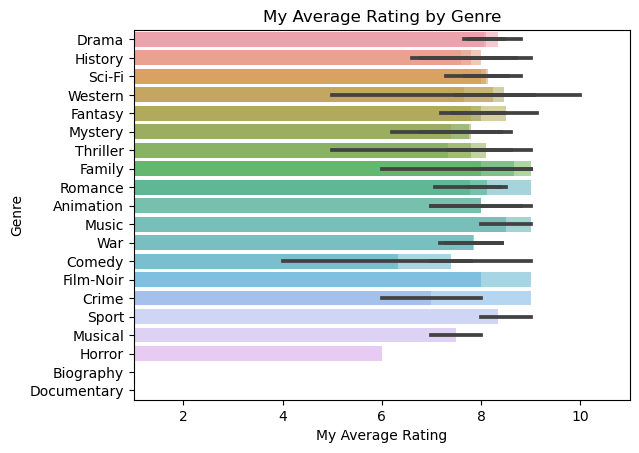

In [105]:
# Plotting Average IMDb Rating by Genre for imdb_df
genre_columns = ['Genre1', 'Genre2', 'Genre3']
for genre in genre_columns:
    sns.barplot(y=imdb_df[genre], x=imdb_df['IMDb Rating'], alpha=0.5)
plt.ylabel('Genre')
plt.xlabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Genre')
plt.xlim(1, 11)  # Set the x-axis range
plt.show()

# Plotting Average IMDb Rating by Genre for reviewed_df
for genre in genre_columns:
    sns.barplot(y=imdb_df[genre], x=reviewed_df['IMDb Rating'], alpha=0.5)
plt.ylabel('Genre')
plt.xlabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Genre (Reviewed)')
plt.xlim(1, 11)  # Set the x-axis range
plt.show()

# Plotting My Average Rating by Genre for reviewed_df
for genre in genre_columns:
    sns.barplot(y=imdb_df[genre], x=reviewed_df['My Rating'], alpha=0.5)
plt.ylabel('Genre')
plt.xlabel('My Average Rating')
plt.title('My Average Rating by Genre')
plt.xlim(1, 11)  # Set the x-axis range
plt.show()

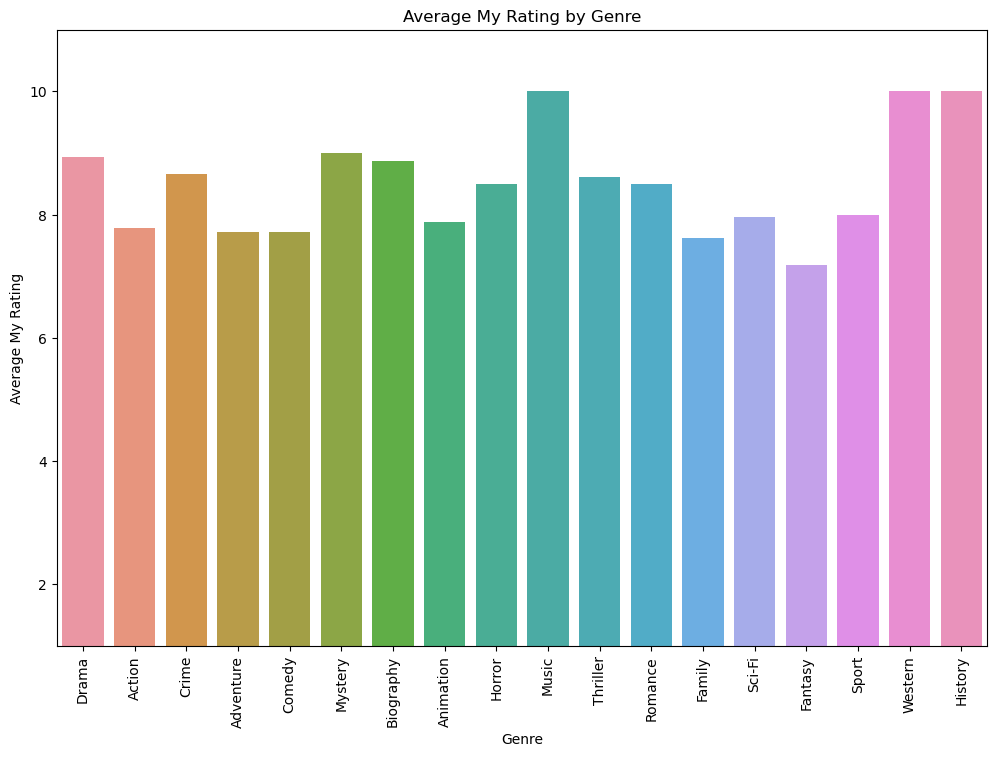

In [106]:
# Create a list of all unique genres
all_genres = pd.concat([reviewed_df['Genre1'], reviewed_df['Genre2'], reviewed_df['Genre3']]).unique()

# Initialize the temporary dataframe with columns for each genre
temp_df = pd.DataFrame(0, index=reviewed_df.index, columns=all_genres)

# Iterate through each movie and add the "My Rating" to the corresponding genre columns
for idx, row in reviewed_df.iterrows():
    for genre in ['Genre1', 'Genre2', 'Genre3']:
        if pd.notna(row[genre]):
            temp_df.at[idx, row[genre]] += row['My Rating']

# Calculate the total ratings and total observations for each genre
total_ratings = temp_df.sum()
total_observations = (temp_df > 0).sum()

# Calculate the average rating for each genre
average_ratings = total_ratings / total_observations

# Plot the average rating for each genre
plt.figure(figsize=(12, 8))
sns.barplot(x=average_ratings.index, y=average_ratings.values)
plt.xlabel('Genre')
plt.ylabel('Average My Rating')
plt.title('Average My Rating by Genre')
plt.xticks(rotation=90)
plt.ylim(1, 11)
plt.show()

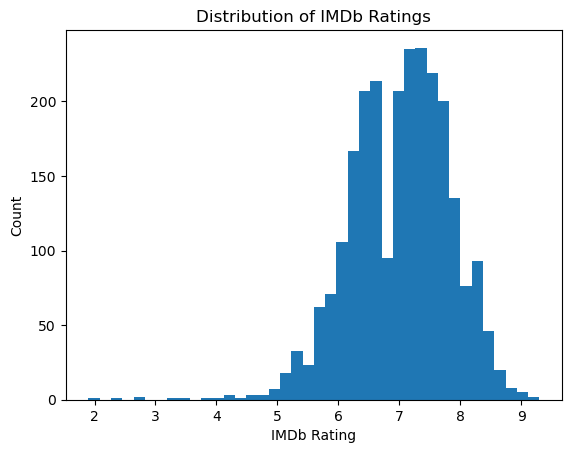

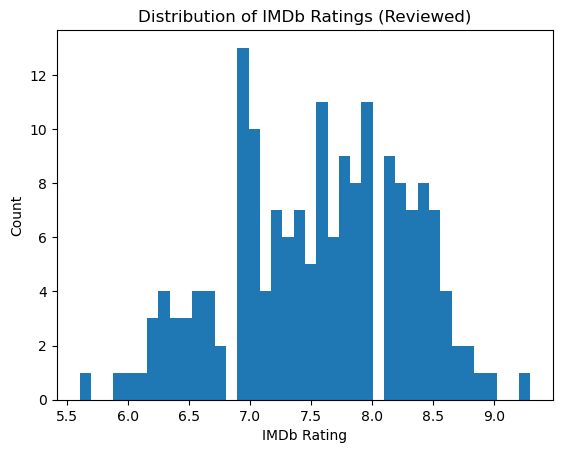

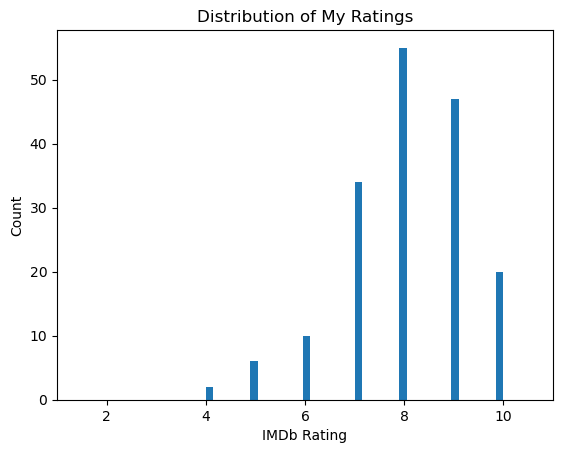

count    2503.000000
mean        7.017978
std         0.820917
min         1.900000
25%         6.500000
50%         7.100000
75%         7.600000
max         9.300000
Name: IMDb Rating, dtype: float64
count    174.000000
mean       7.560920
std        0.727631
min        5.600000
25%        7.000000
50%        7.600000
75%        8.100000
max        9.300000
Name: IMDb Rating, dtype: float64
count    174.000000
mean       8.040230
std        1.287374
min        4.000000
25%        7.000000
50%        8.000000
75%        9.000000
max       10.000000
Name: My Rating, dtype: float64


In [107]:
plt.hist(imdb_df['IMDb Rating'], bins=40)
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.title('Distribution of IMDb Ratings')
plt.show()

plt.hist(reviewed_df['IMDb Rating'], bins=40)
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.title('Distribution of IMDb Ratings (Reviewed)')
plt.show()

plt.hist(reviewed_df['My Rating'], bins=40)
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.xlim(1,11)
plt.title('Distribution of My Ratings')
plt.show()

print(imdb_df['IMDb Rating'].describe())
print(reviewed_df['IMDb Rating'].describe())
print(reviewed_df['My Rating'].describe())


### Comparing My Rating to IMDB Rating

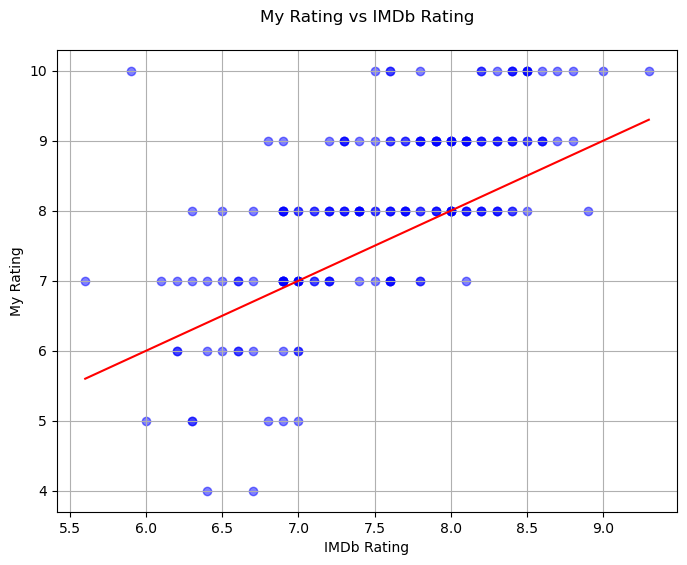

In [108]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the scatter plot with custom marker and color
plt.scatter(reviewed_df['IMDb Rating'], reviewed_df['My Rating'], marker='o', color='blue', alpha=0.5)

# Add a red line with slope 1 and intercept 0 to indicate if I liked a movie more or less than imdb rating
slope, intercept = 1, 0
plt.plot(reviewed_df['IMDb Rating'], slope * reviewed_df['IMDb Rating'] + intercept, color='red')

# Set the x-axis and y-axis labels
plt.xlabel('IMDb Rating')
plt.ylabel('My Rating')

# Set the title and adjust the position
plt.title('My Rating vs IMDb Rating', pad=20)

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()


### Distribution of Lead Actors

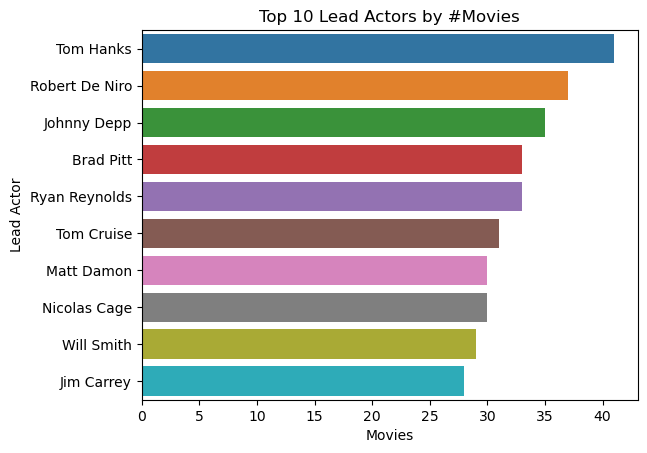

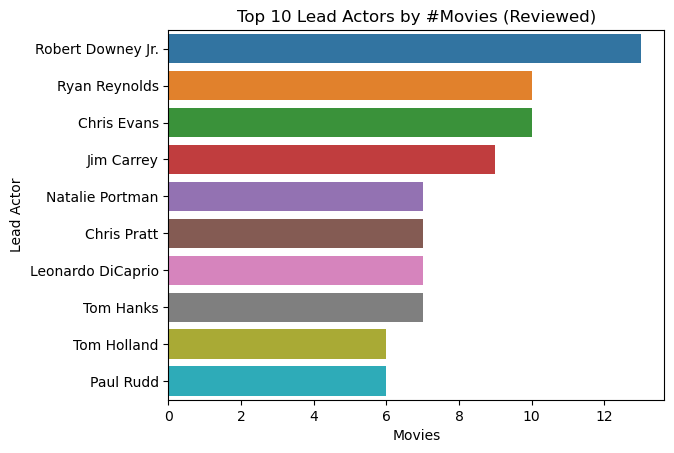

In [109]:
lead_actors = pd.concat([imdb_df['lead_cast_1_name'], imdb_df['lead_cast_2_name'], imdb_df['lead_cast_3_name']])

# Get the top 10 lead actors
top_10_actors = lead_actors.value_counts().head(10)

# Plot the bar chart
sns.barplot(y=top_10_actors.index, x=top_10_actors.values)
plt.xlabel('Movies')
plt.ylabel('Lead Actor')
plt.title('Top 10 Lead Actors by #Movies')
plt.show()


# Get the top 10 lead actors from reviewed_df
lead_actors = pd.concat([reviewed_df['lead_cast_1_name'], reviewed_df['lead_cast_2_name'], reviewed_df['lead_cast_3_name']])
top_10_actors = lead_actors.value_counts().head(10)

# Plot the bar chart
sns.barplot(y=top_10_actors.index, x=top_10_actors.values)
plt.xlabel('Movies')
plt.ylabel('Lead Actor')
plt.title('Top 10 Lead Actors by #Movies (Reviewed)')
plt.show()

## Comparing My Ratings 

### Create a weighted version of lead actors to find User's Highest Rated Actors on average

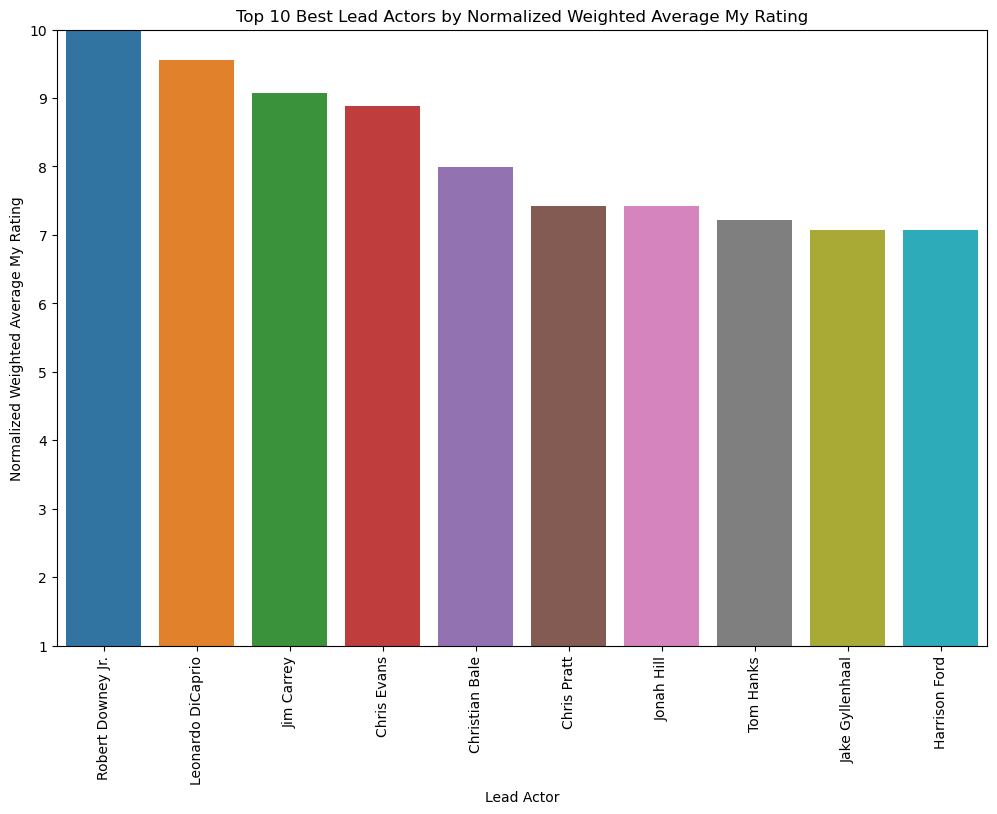

In [110]:
# Create a list of all unique lead actors
all_lead_actors = pd.concat([reviewed_df['lead_cast_1_name'], reviewed_df['lead_cast_2_name'], reviewed_df['lead_cast_3_name']]).unique()

# Initialize the temporary dataframe with columns for each lead actor
temp_lead_actors_df = pd.DataFrame(0, index=reviewed_df.index, columns=all_lead_actors)

# Iterate through each movie and add the "My Rating" to the corresponding lead actor columns, ensuring each actor is only counted once per movie
for idx, row in reviewed_df.iterrows():
    actors_seen = set()
    for lead_actor in ['lead_cast_1_name', 'lead_cast_2_name', 'lead_cast_3_name']:
        actor_name = row[lead_actor]
        if pd.notna(actor_name) and actor_name not in actors_seen:
            temp_lead_actors_df.at[idx, actor_name] += row['My Rating']
            actors_seen.add(actor_name)

# Calculate the total ratings and total observations for each lead actor
total_lead_actor_ratings = temp_lead_actors_df.sum()
total_lead_actor_observations = (temp_lead_actors_df > 0).sum()

# Calculate the average rating for each lead actor
average_lead_actor_ratings = total_lead_actor_ratings / total_lead_actor_observations

# Apply a weighting factor to reward actors who have been in more movies
weighting_factor = np.log1p(total_lead_actor_observations)  # Using log1p to avoid zero and smooth the effect
weighted_average_ratings = average_lead_actor_ratings * weighting_factor

# Normalize the weighted average ratings to fit within the range of 1 to 10
min_rating = weighted_average_ratings.min()
max_rating = weighted_average_ratings.max()
normalized_weighted_ratings = 1 + 9 * (weighted_average_ratings - min_rating) / (max_rating - min_rating)

# Get the top 10 best actors based on normalized weighted average rating
top_10_best_actors = normalized_weighted_ratings.nlargest(10)

# Plot the average rating for the top 10 best actors
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_best_actors.index, y=top_10_best_actors.values)
plt.xlabel('Lead Actor')
plt.ylabel('Normalized Weighted Average My Rating')
plt.title('Top 10 Best Lead Actors by Normalized Weighted Average My Rating')
plt.xticks(rotation=90)
plt.ylim(1, 10)
plt.show()

### Find the worst actors from the User's Ratings

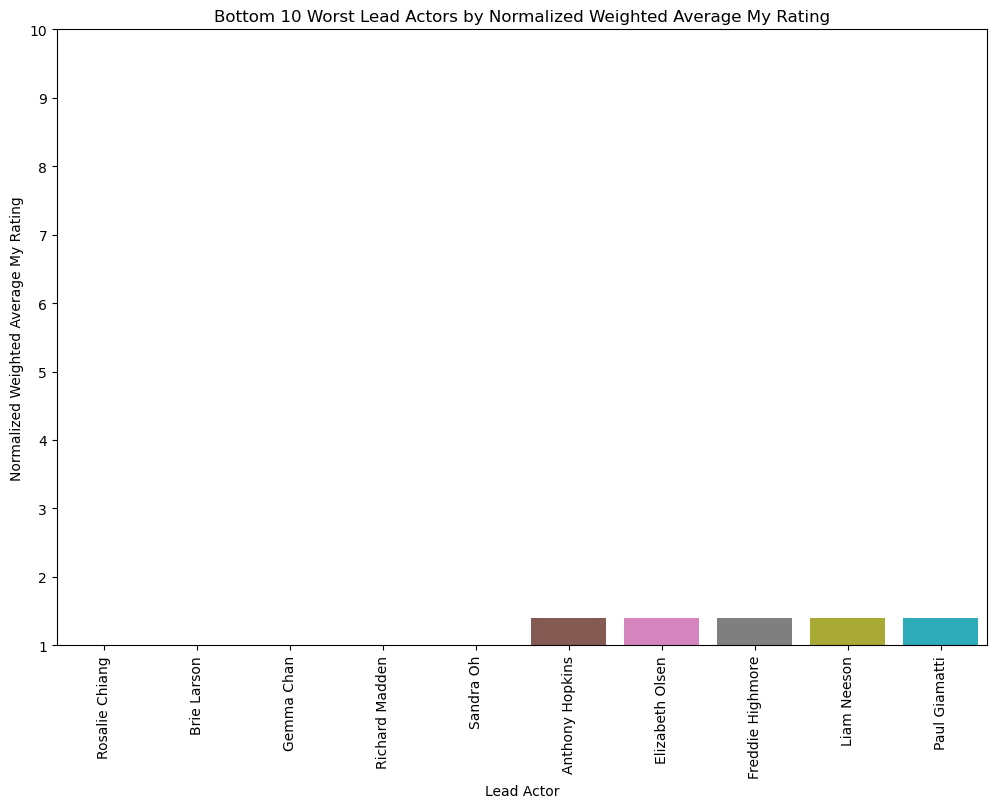

In [111]:
# Get the bottom 10 worst actors based on normalized weighted average rating
bottom_10_worst_actors = normalized_weighted_ratings.nsmallest(10)

# Plot the average rating for the bottom 10 worst actors
plt.figure(figsize=(12, 8))
sns.barplot(x=bottom_10_worst_actors.index, y=bottom_10_worst_actors.values)
plt.xlabel('Lead Actor')
plt.ylabel('Normalized Weighted Average My Rating')
plt.title('Bottom 10 Worst Lead Actors by Normalized Weighted Average My Rating')
plt.xticks(rotation=90)
plt.ylim(1, 10)
plt.show()

In [112]:
print(imdb_df.columns.tolist())

['Const', 'Title', 'Director', 'Famous Director', 'ReleaseYear', 'Age', 'Runtime', 'LongMovie', 'genres', 'Genre1', 'Genre2', 'Genre3', 'numVotes', 'IMDb Rating', 'My Rating', 'DifferenceBetweenRatings', 'has_rated', 'Date Rated', 'lead_cast_1_name', 'lead_cast_2_name', 'lead_cast_3_name', 'SuperFamousMovie', 'is_christopher_nolan', 'is_denis_villeneuve', 'is_quentin_tarantino', 'is_george_lucas', 'is_sam_raimi', 'is_steven_spielberg', 'is_ridley_scott', 'is_tim_burton', 'is_robert_zemeckis', 'is_martin_scorsese', 'isbiography', 'iscrime', 'isdrama', 'ishistory', 'ishorror', 'ismusic', 'ismystery', 'isromance', 'issport', 'isthriller', 'iswestern', 'is_robert_downey_jr.', 'is_leonardo_dicaprio', 'is_jim_carrey', 'is_chris_evans', 'is_christian_bale', 'is_chris_pratt', 'is_jonah_hill', 'is_rosalie_chiang', 'is_brie_larson', 'is_gemma_chan', 'is_New', 'is_Old', 'is_Classic']


In [113]:
for column in imdb_df.columns.tolist():
    print(column)


Const
Title
Director
Famous Director
ReleaseYear
Age
Runtime
LongMovie
genres
Genre1
Genre2
Genre3
numVotes
IMDb Rating
My Rating
DifferenceBetweenRatings
has_rated
Date Rated
lead_cast_1_name
lead_cast_2_name
lead_cast_3_name
SuperFamousMovie
is_christopher_nolan
is_denis_villeneuve
is_quentin_tarantino
is_george_lucas
is_sam_raimi
is_steven_spielberg
is_ridley_scott
is_tim_burton
is_robert_zemeckis
is_martin_scorsese
isbiography
iscrime
isdrama
ishistory
ishorror
ismusic
ismystery
isromance
issport
isthriller
iswestern
is_robert_downey_jr.
is_leonardo_dicaprio
is_jim_carrey
is_chris_evans
is_christian_bale
is_chris_pratt
is_jonah_hill
is_rosalie_chiang
is_brie_larson
is_gemma_chan
is_New
is_Old
is_Classic


In [114]:
genre_group = imdb_df.groupby('Genre1')
genre_summary1 = genre_group.agg({'Genre1': 'count', 'IMDb Rating': 'sum'})
genre_summary1.columns = ['Genre Count', 'Total IMDb Rating']
# print(genre_summary1)

genre_group = imdb_df.groupby('Genre2')
genre_summary2 = genre_group.agg({'Genre2': 'count', 'IMDb Rating': 'sum'})
genre_summary2.columns = ['Genre Count', 'Total IMDb Rating']
# print(genre_summary2)

genre_group = imdb_df.groupby('Genre3')
genre_summary3 = genre_group.agg({'Genre3': 'count', 'IMDb Rating': 'sum'})
genre_summary3.columns = ['Genre Count', 'Total IMDb Rating']
# print(genre_summary3)

imdb_genre_summary = pd.concat([genre_summary1, genre_summary2, genre_summary3])
imdb_genre_summary = imdb_genre_summary.groupby(level=0).sum()
imdb_genre_summary["Average Rating"] = imdb_genre_summary["Total IMDb Rating"] / imdb_genre_summary["Genre Count"]
print(imdb_genre_summary)

           Genre Count  Total IMDb Rating  Average Rating
Action             935             6324.1        6.763743
Adventure          747             5134.5        6.873494
Animation          183             1333.9        7.289071
Biography          172             1292.4        7.513953
Comedy             792             5464.3        6.899369
...                ...                ...             ...
Sci-Fi             305             2063.3        6.764918
Sport               40              283.8        7.095000
Thriller           478             3301.3        6.906485
War                 46              356.6        7.752174
Western             15              115.8        7.720000

[22 rows x 3 columns]


In [115]:
genre_group = reviewed_df.groupby('Genre1')
genre_summary1 = genre_group.agg({'Genre1': 'count', 'IMDb Rating': 'sum', "My Rating": "sum"})
genre_summary1.columns = ['Genre Count', 'Total IMDb Rating', 'Total My Rating']
# print(genre_summary1)

genre_group = reviewed_df.groupby('Genre2')
genre_summary2 = genre_group.agg({'Genre2': 'count', 'IMDb Rating': 'sum', "My Rating": "sum"})
genre_summary2.columns = ['Genre Count', 'Total IMDb Rating', 'Total My Rating']
# print(genre_summary2)

genre_group = reviewed_df.groupby('Genre3')
genre_summary3 = genre_group.agg({'Genre3': 'count', 'IMDb Rating': 'sum', "My Rating": "sum"})
genre_summary3.columns = ['Genre Count', 'Total IMDb Rating', 'Total My Rating']
# print(genre_summary3)

reviewed_genre_summary = pd.concat([genre_summary1, genre_summary2, genre_summary3])
reviewed_genre_summary = reviewed_genre_summary.groupby(level=0).sum()
reviewed_genre_summary["Average Rating"] = reviewed_genre_summary["Total IMDb Rating"] / reviewed_genre_summary["Genre Count"]
reviewed_genre_summary["My Average Rating"] = reviewed_genre_summary["Total My Rating"] / reviewed_genre_summary["Genre Count"]
reviewed_genre_summary["Difference"] = reviewed_genre_summary["My Average Rating"] - reviewed_genre_summary["Average Rating"]
print(reviewed_genre_summary)

           Genre Count  Total IMDb Rating  Total My Rating  Average Rating  \
Action              85              635.0            662.0        7.470588   
Adventure          104              778.8            802.0        7.488462   
Animation           41              315.3            323.0        7.690244   
Biography            8               63.9             71.0        7.987500   
Comedy              71              516.3            548.0        7.271831   
Crime               24              185.3            208.0        7.720833   
Drama               48              386.4            429.0        8.050000   
Family               8               61.6             61.0        7.700000   
Fantasy             21              153.7            151.0        7.319048   
History              1                8.3             10.0        8.300000   
Horror               4               30.8             34.0        7.700000   
Music                1                8.5             10.0      

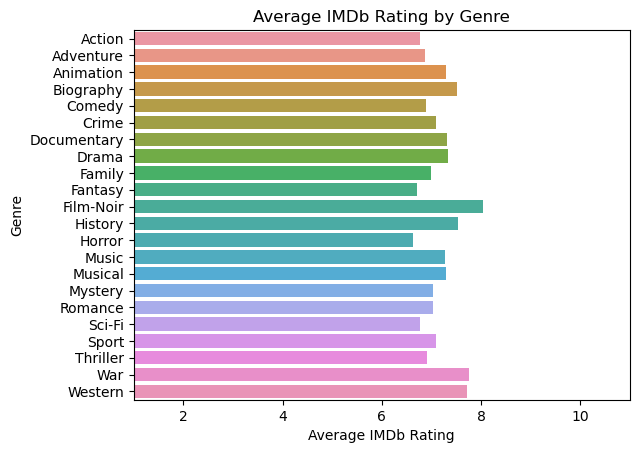

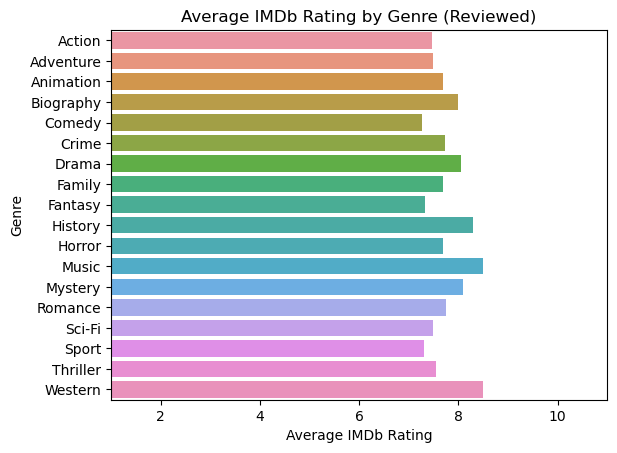

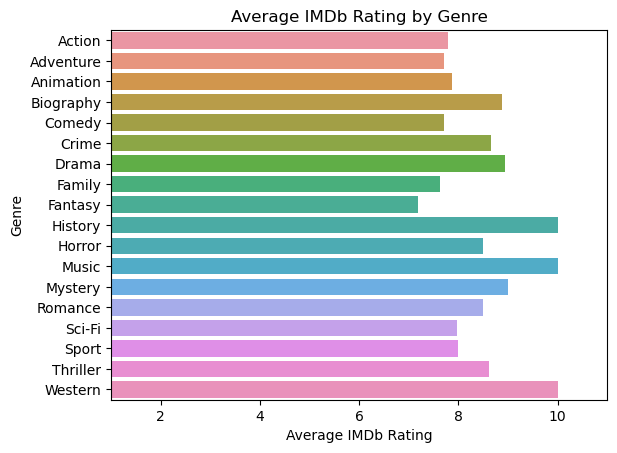

(-5.0, 5.0)

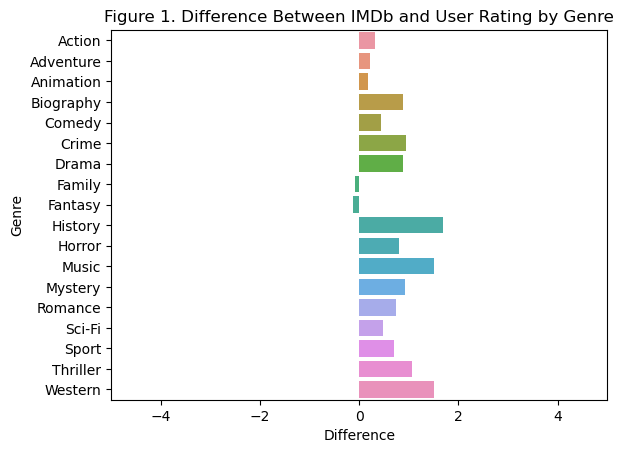

In [116]:
# Here I am going to make a barplot of genre_summary comparing the average rating of each genre
sns.barplot(y=imdb_genre_summary.index, x=imdb_genre_summary["Average Rating"])
plt.ylabel('Genre')
plt.xlabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Genre')
plt.xlim(1, 11)  # Set the x-axis range
plt.show()

sns.barplot(y=reviewed_genre_summary.index, x=reviewed_genre_summary["Average Rating"])
plt.ylabel('Genre')
plt.xlabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Genre (Reviewed)')
plt.xlim(1, 11)  # Set the x-axis range
plt.show()

sns.barplot(y=reviewed_genre_summary.index, x=reviewed_genre_summary["My Average Rating"])
plt.ylabel('Genre')
plt.xlabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Genre')
plt.xlim(1, 11)  # Set the x-axis range
plt.show()

sns.barplot(y=reviewed_genre_summary.index, x=reviewed_genre_summary["Difference"])
plt.ylabel('Genre')
plt.xlabel('Difference')
plt.title('Figure 1. Difference Between IMDb and User Rating by Genre')
plt.xlim(-5, 5)  # Set the x-axis range

In [117]:
reviewed_df

,Const,Title,Director,Famous Director,ReleaseYear,Age,Runtime,LongMovie,genres,Genre1,Genre2,...,is_jim_carrey,is_chris_evans,is_christian_bale,is_chris_pratt,is_jonah_hill,is_rosalie_chiang,is_brie_larson,is_gemma_chan,is_New,is_Old,is_Classic
0,tt0111161,The Shawshank Redemption,Frank Darabont,False,1994,30,142,True,Drama,Drama,NaN,...,False,False,False,False,False,False,False,False,False,False,True
1,tt0468569,The Dark Knight,Christopher Nolan,True,2008,16,152,True,"Action,Crime,Drama",Action,Crime,...,False,False,True,False,False,False,False,False,False,True,False
2,tt0110912,Pulp Fiction,Quentin Tarantino,True,1994,30,154,True,"Crime,Drama",Crime,Drama,...,False,False,False,False,False,False,False,False,False,False,True
3,tt1375666,Inception,Christopher Nolan,True,2010,14,148,True,"Action,Adventure,Sci-Fi",Action,Adventure,...,False,False,False,False,False,False,False,False,False,True,False
4,tt0137523,Fight Club,David Fincher,True,1999,25,139,True,Drama,Drama,NaN,...,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,tt1216475,Cars 2,Multiple Directors,True,2011,13,106,False,"Adventure,Animation,Comedy",Adventure,Animation,...,False,False,False,False,False,False,False,False,False,True,False
170,tt0115798,The Cable Guy,Ben Stiller,True,1996,28,96,False,"Comedy,Drama,Thriller",Comedy,Drama,...,True,False,False,False,False,False,False,False,False,False,True
171,tt10954600,Ant-Man and the Wasp: Quantumania,Peyton Reed,True,2023,1,124,True,"Action,Adventure,Comedy",Action,Adventure,...,False,False,False,False,False,False,False,False,True,False,False
172,tt14209916,Cocaine Bear,Elizabeth Banks,False,2023,1,95,False,"Comedy,Crime,Thriller",Comedy,Crime,...,False,False,False,False,False,False,False,False,True,False,False


## Principal Component Analysis